# FDU PRML 2023 Fall Assignment 1.2

Name: <your name>

Student ID: <your student id>

<font color='red'>**Deadline: 2023-10-09 23:59**</font>

<font color='red'>**Overall score weight: 60/100**</font>

This is the last part of the assignment. Our task is quite simple: implementing your own scikit-learn-like library with `numpy`.

In [1]:
# Auto reload external modules, which means you can modify the code of our fduml implementation without restarting the kernel.
%load_ext autoreload
%autoreload 2

In [2]:
# Basic imports
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rc
import sklearn

np.random.seed(42)
random.seed(42)

You have to implement several standard regression and classification methods in the ./fduml folder:

- Linear Regression (15 points)

- kNN Classification (15 points)

- DecisionTree Classification (15 points)

- Softmax Classification (15 points)

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of Sklearn.

## Implement and test (40 points)

We have prepared several test cases for you to check if your code works correctly. After you write your own implementation, try the following code for testing.

In [3]:
from fduml import *

In [4]:
# Test Linear Regression (10 points)

from fduml.linear_model.tests.test_linear_reg import test_linear_regression
test_linear_regression()

In [5]:
# Test Softmax Regression (10 points)

from fduml.linear_model.tests.test_softmax import test_softmax
test_softmax()

In [6]:
# Test kNN Classification (10 points)

from fduml.neighbors.tests.test_knn import test_kneighbors_classifier
test_kneighbors_classifier()

In [7]:
# Test DecisionTree Classification (10 points)

from fduml.tree.tests.test_decision_tree import test_dt_classification
test_dt_classification()

[[-2 -1]
 [-1 -1]
 [-1 -2]
 [ 1  1]
 [ 1  2]
 [ 2  1]]


## Compare with Sklearn (20 points)

Since the interface of our fduml is the same as that of sklearn, you can easily compare the output of your implementation with that of sklearn. In this part, we will try to complete the tasks in nearly the same code as Assignment 1.1, but using our own implementation.

In the conclusion part, try to answer the following questions:

- Is the accuracy of your implementation the same as that of sklearn? If not, what can be the reason?

- Is the running time of your implementation the same as that of sklearn? If not, what can be the reason?

- If there is any special thing you want to mention, please write it down.

Note that we do not require you to match the accuracy and running time of sklearn (which can be quite difficult), but you should be able to explain the reason if they are different.

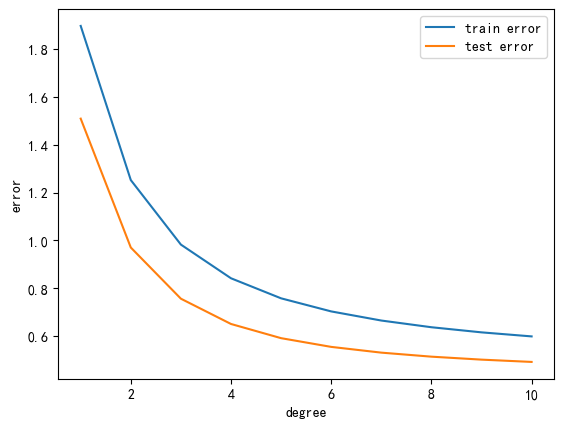

用时:  1.1001096999971196 s


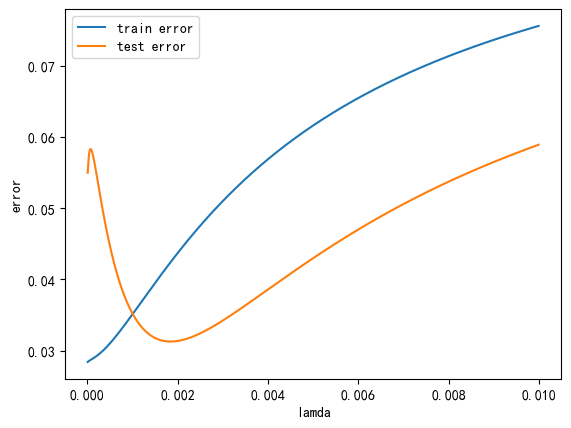

In [8]:
# 多项式拟合
import math
import time
#生成参数
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier =False, outlier_ratio = 0.001):
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon

    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5
    return X, y

func = sin
interval = (0,1)
train_num = 20
test_num = 20
noise = 0.2
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise=noise)
X_test, y_test = create_toy_data(func=func, interval=interval,sample_num=test_num, noise=noise)


#普通的多项式拟合
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from fduml.linear_model import LinearRegression


start = time.perf_counter()
def compute_error(degree,X_train,y_train,X_test,y_test):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pre = model.predict(poly.fit_transform(X_test))
    y_train_pre=model.predict(X_train_poly)
    train_error=mean_squared_error(y_train_pre, y_train)
    test_error=mean_squared_error(y_test,y_pre)
    return train_error,test_error

d=list(range(1,11))
train_error, test_error=list(zip(*[compute_error(i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) for i in d]))

plt.plot(d, train_error, label='train error') 
plt.plot(d, test_error, label='test error') 

plt.xlabel('degree')  
plt.ylabel('error') 
plt.legend() 
plt.show()  



#使用了正则化的多项式拟合
from sklearn.linear_model import Ridge
def ridge(lamda,X_train,y_train,X_test,y_test):
    poly=PolynomialFeatures(degree=10)
    X_train_poly=poly.fit_transform(X_train)
    model=Ridge(alpha=lamda)
    model.fit(X_train_poly,y_train)

    y_pre = model.predict(poly.fit_transform(X_test))
    y_train_pre=model.predict(X_train_poly)
    train_error=mean_squared_error(y_train_pre, y_train)
    test_error=mean_squared_error(y_test,y_pre)
    return train_error,test_error

end = time.perf_counter()
print("用时: ",end-start,'s')

lamda=[i*0.00001 for i in range(1,1000)]
train_error, test_error=list(zip(*[ridge(i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) for i in lamda]))

plt.plot(lamda, train_error, label='train error') 
plt.plot(lamda, test_error, label='test error') 

plt.xlabel('lamda')  
plt.ylabel('error') 
plt.legend() 
plt.show()  


In [9]:
import pandas as pd


df_train=pd.read_csv('water_potability_train.csv')
df_test=pd.read_csv('water_potability_test.csv')
df_train=df_train[df_train!=-1].dropna()
df_test=df_test[df_test!=-1].dropna()

x_train=np.array((df_train.iloc[:, :-1].values).tolist())
y_train=np.array((df_train.iloc[:,-1].values).tolist())
x_test=np.array((df_test.iloc[:, :-1].values).tolist())
y_test=np.array((df_test.iloc[:,-1].values).tolist())



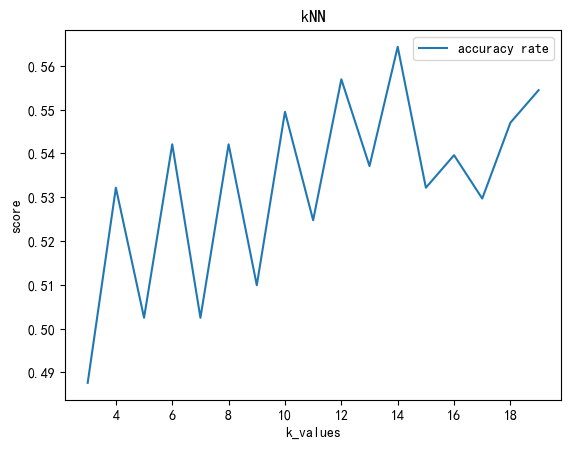

best accuracy score:  0.5643564356435643


In [10]:
from fduml.neighbors import KNeighborsClassifier

# kNN
# 定义要尝试的 k 值范围
k_values = list(range(3,20))
accuracy=[0]*17

x_valid=x_train[:500]
y_valid=y_train[:500]

start = time.perf_counter()
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy[k-3] = accuracy_score(y_pred, y_test)

end = time.perf_counter()

plt.plot(k_values, accuracy, label='accuracy rate') 

plt.xlabel('k_values')  
plt.ylabel('score') 
plt.title('kNN')
plt.legend() 
plt.show() 

print("best accuracy score: ", max(accuracy))

In [11]:
#decision tree
from fduml.tree import DecisionTreeClassifier

criterion = "info_gain_ratio"
dt_clf = DecisionTreeClassifier(criterion=criterion, random_state=0)
start = time.perf_counter()
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)
end = time.perf_counter()
print("Accuracy=",accuracy_score(y_test,y_pred))
print("用时: ",end-start,'s')

Accuracy= 0.5371287128712872
用时:  27.770014100009575 s


In [12]:
#softmax
import numpy as np
from fduml.linear_model import SoftmaxClassifier

softmax = SoftmaxClassifier()
start = time.perf_counter()
softmax.fit(x_train, y_train)
y_pred = softmax.predict(x_test)
end = time.perf_counter()
print("Accuracy=",accuracy_score(y_test,y_pred))
print("用时: ",end-start,'s')

Accuracy= 0.594059405940594
用时:  0.0821486999921035 s


c:\Users\lenovo\Desktop\File\PRML\Assignment1\1_2\fduml\linear_model\softmax.py:207: RuntimeWarning: invalid value encountered in divide
  softmax = np.exp(scores) / np.sum(np.exp(scores))
c:\Users\lenovo\Desktop\File\PRML\Assignment1\1_2\fduml\linear_model\softmax.py:209: RuntimeWarning: divide by zero encountered in log
  loss -= np.log(softmax[y[i]])


## Conclusion

为了防止命名重复，在这里我们不选择在该ipynb文件中运行sklearn的情况，故在此直接贴出1_1运行结果的截图如下(依次为线性回归、kNN、决策树与逻辑回归)：










































可以看到其准确率和MSE与本实验个人实现的程序没有太大差异，都在0.6左右，但是在运行速度上却远快于本实验实现的程序。
下面是一些可能原因的分析：

1、算法实现效率：手动实现的算法可能没有经过高度优化，或者使用了一些较慢的数据结构或算法。相比之下，sklearn库中的算法经过了大量的优化和性能调整，使用了高效的数据结构和算法，以提高执行效率。

2、数据预处理：sklearn库中的kNN方法通常会在内部对数据进行预处理和优化。这可能包括数据的标准化、降维或特征选择等步骤，以提高算法的效率和准确性。如果手动实现没有进行这些预处理步骤，那么它可能会比sklearn库中的方法慢。

3、数据规模：手动实现没有考虑到大规模数据集的情况，而sklearn库中的方法进行了针对性的优化，那么在处理大规模数据时，手动实现可能会表现得更慢。

4、库函数的底层实现：sklearn库中的kNN方法可能使用了底层的高度优化的C或C++代码，而手动实现可能是使用Python编写的。由于C/C++代码比Python代码更接近底层硬件，因此它们通常能够更高效地执行计算密集型任务。